In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Importing the data
df = pd.read_csv('rental_info.csv')

#Converting Str to date time objects 
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])

#Obtaining rental duration in days
df['rental_length'] =  (df['return_date'] - df['rental_date'])
df['rental_length_days'] = df['rental_length'].dt.days
df['special_features'].value_counts()

#Creating Dummy Variables
df['deleted_scenes'] = df['special_features'].apply(lambda x: "Deleted Scenes" in x).astype(int)
df['behind_the_scenes'] = df['special_features'].apply(lambda x: 'Behind the Scenes' in x).astype(int)

#Creating Data
y = df['rental_length_days'].copy()
X = df[['amount', 'amount_2', 'rental_rate', 'rental_rate_2', 'length', 'length_2', 'deleted_scenes', 'replacement_cost', 'behind_the_scenes', "NC-17", "PG", "PG-13", "R", 'release_year']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'amount'),
  Text(1, 0, 'amount_2'),
  Text(2, 0, 'rental_rate'),
  Text(3, 0, 'rental_rate_2'),
  Text(4, 0, 'length'),
  Text(5, 0, 'length_2'),
  Text(6, 0, 'deleted_scenes'),
  Text(7, 0, 'replacement_cost'),
  Text(8, 0, 'behind_the_scenes'),
  Text(9, 0, 'NC-17'),
  Text(10, 0, 'PG'),
  Text(11, 0, 'PG-13'),
  Text(12, 0, 'R'),
  Text(13, 0, 'release_year')])

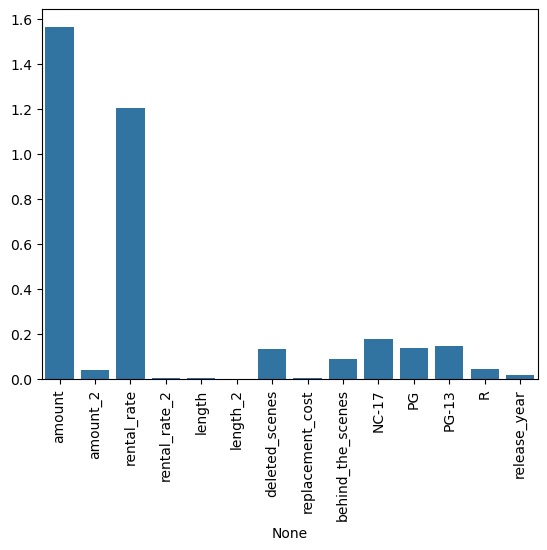

In [19]:
#Setting up lasso regression
params_lasso = {'alpha' : np.arange(0.00001,10,500)}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso,param_grid=params_lasso, cv = 5)
lasso_cv.fit(X_train, y_train)
lasso_final = lasso_cv.best_estimator_

lasso_final.fit(X_train, y_train)
y_lasso_pred = lasso_final.predict(X_test)
mse_lasso = MSE(y_lasso_pred, y_test)

x_axis_lasso = X_train.columns
feature_importance = abs(lasso_final.coef_)
sns.barplot(x = x_axis_lasso, y = feature_importance)
plt.xticks(rotation = 90)

In [13]:
#setting up DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 9)

params_dt = {'max_depth' : np.arange(1,25,1)}
dt_cv = GridSearchCV(estimator = dt, param_grid = params_dt, cv = 5)
dt_cv.fit(X_train,y_train)

dt_final = dt_cv.best_estimator_
dt_final.fit(X_train,y_train)
y_pred_dt = dt_final.predict(X_test)

mse_dt = MSE(y_pred_dt, y_test)
print(mse_dt)


2.163306427253599


In [15]:
#setting up RandomForestRegressor 

rf = RandomForestRegressor(max_depth = 20, random_state = 9)

params_rf = {'n_estimators' : np.arange(1,50,2)}
rf_cv = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5)
rf_cv.fit(X_train,y_train)
rf_final = rf_cv.best_estimator_
y_pred_rf = rf_final.predict(X_test)
mse_rf = MSE(y_pred_rf, y_test)

print(mse_rf)


2.0348716629410744


In [ ]:
best_model = rf_final
best_mse = mse_rf